### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [4]:
len(university_df)

6442

In [5]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378


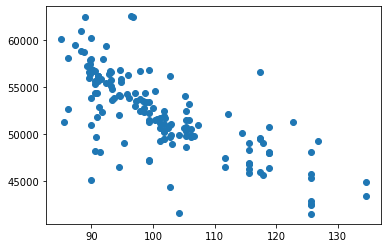

In [6]:
plt.scatter(
    university_df["RPP_all"].values,
    university_df["REAL_MEDIAN_SALARY"].values,
)

In [7]:
income_df = pd.read_csv(DATA_DIR / 'income' / 'income.csv', skiprows=4)
income_df = income_df[income_df.Description == 'Real per capita personal income (chained (2012) dollars) 2/'] 
income_df["RPI_per_capita"] = income_df["2019"]
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)
cost_of_living_df['RPPs'] = cost_of_living_df['2019']
income_by_COL = cost_of_living_df[['RPPs', 'GeoName']].merge(income_df[['RPI_per_capita', 'GeoName', 'GeoFips']], on='GeoName')
income_by_COL['statistical_area'] = [i.split(' (')[0] for i in income_by_COL.GeoName.values]
income_by_COL[:10]

,RPPs,GeoName,RPI_per_capita,GeoFips,statistical_area
0,100.0,United States,51424.0,00000,United States
1,98.8,United States,51424.0,00000,United States
2,102.0,United States,51424.0,00000,United States
3,100.0,United States,51424.0,00000,United States
4,90.3,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
5,96.0,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
6,80.1,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
7,91.2,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
8,90.0,"Akron, OH (Metropolitan Statistical Area)",52131.0,10420,"Akron, OH"
9,95.9,"Akron, OH (Metropolitan Statistical Area)",52131.0,10420,"Akron, OH"


In [8]:
income_by_COL.GeoFips.values

array(['00000', '00000', '00000', ..., '49740', '49740', '49740'],
      dtype=object)

In [9]:
regional_incomes = []
for idx, row in university_df.iterrows():
    regional_income_2012 = income_by_COL[
        (income_by_COL.GeoFips.values.astype(int) == row.CBSA)
    ].RPI_per_capita.values

    if len(regional_income_2012) > 0:
        regional_incomes.append(regional_income_2012[0])
    else:
        print(row.INSTNM)
        regional_incomes.append(np.nan)

Dartmouth College
Washington State University
Oklahoma State University-Main Campus
Ohio University-Main Campus
University of Wyoming
University of Mississippi
University of Mississippi
Montana State University
Mississippi State University
Louisiana Tech University
University of Idaho
Missouri University of Science and Technology
Michigan Technological University
Clarkson University
Central Alabama Community College
Enterprise State Community College
New Beginning College of Cosmetology
George C Wallace Community College-Dothan
George C Wallace State Community College-Hanceville
George C Wallace State Community College-Selma
Judson College
University of West Alabama
Lurleen B Wallace Community College
Marion Military Institute
Northeast Alabama Community College
Reid State Technical College
Selma University
Snead State Community College
Talladega College
Troy University
Tuskegee University
Bevill State Community College
University of Alaska Southeast
Alaska Vocational Technical Center


Mississippi Delta Community College
Mississippi University for Women
Mississippi Valley State University
Mississippi College of Beauty Culture
Northeast Mississippi Community College
Pearl River Community College
Southeastern Baptist College
Southwest Mississippi Community College
Vaughn Beauty College
Central Christian College of the Bible
University of Central Missouri
Grand River Technical School
Conception Seminary College
Cottey College
Culver-Stockton College
Hannibal-LaGrange University
A T Still University of Health Sciences
Lake Career and Technical Center
Mineral Area College
Missouri Valley College
Moberly Area Community College
Truman State University
Northwest Missouri State University
College of the Ozarks
Poplar Bluff Technical Career Center
Rolla Technical Institute/Center
Salem College of Hairstyling
American College of Hair Design Inc
Missouri State University-West Plains
State Fair Community College
Three Rivers College
North Central Missouri College
Academy of Cosme

Charzanne Beauty College
Northeastern Technical College
Claflin University
Denmark Technical College
Erskine College
Lander University
Limestone University
Newberry College
Orangeburg Calhoun Technical College
Piedmont Technical College
University of South Carolina-Salkehatchie
University of South Carolina-Union
South Carolina State University
Voorhees College
Williamsburg Technical College
Black Hills State University
Dakota State University
Dakota Wesleyan University
Lake Area Technical College
Mitchell Technical College
Mount Marty University
Northern State University
Oglala Lakota College
Presentation College
Avera Sacred Heart Hospital
South Dakota State University
Sinte Gleska University
Sisseton Wahpeton College
University of South Dakota
Tennessee College of Applied Technology-Athens
Bethel University
Bryan College-Dayton
Dyersburg State Community College
The Hair Academy LLC
Tennessee College of Applied Technology-Hohenwald
Lincoln Memorial University
Tennessee College of Appl

Southeastern Technical College
KC's School of Hair Design
Continental School of Beauty Culture-Olean
Knox County Career Center
Chisholm Trail Technology Center
Gordon Cooper Technology Center
Kiamichi Technology Center-McAlester
CEM College-Humacao
Colegio Mayor de Tecnologia Inc
Institucion Chaviano de Mayaguez
EDIC College
Liceo de Arte-Dise-O y Comercio
Universal Technology College of Puerto Rico
Mr Wayne's School of Unisex Hair Design
College of the Marshall Islands
Nuvani Institute
Bay Mills Community College
Faust Institute of Cosmetology-Spirit Lake
Southwest Collegiate Institute for the Deaf
Hawaii Community College
Buckeye Joint Vocational School
Sandusky Career Center
Erie 2 Chautauqua Cattaraugus BOCES-Practical Nursing Program
Eastern New Mexico University Ruidoso Branch Community College
Mid-EastCTC-Adult Education
Frontier Community College
Lincoln Trail College
Wabash Valley College
Inter American University of Puerto Rico-School of Optometry
Emma's Beauty Academy-Juana 

NUC University - IBC Institute - Ponce
NUC University - IBC Institute - Mayag?ez
NUC University - IBC Institute - Guayama
NUC University - IBC Institute - Fajardo
NUC University - IBC Institute - Manat?
NUC University - IBC Institute - Los Colobos
NUC University - IBC Institute - Moca
NUC University - IBC Institute - Aguadilla
NUC University - IBC Institute - Caguas
NUC University - IBC Institute - Arecibo
NUC University - IBC Institute - Escorial
NUC University - IBC Institute - Bayam?n
NUC University - IBC Institute - Yauco
Advantage Technical College-Aguadilla
Columbia College - Minot AFB
Columbia College - Fort Leonard Wood 58th Trans BN


In [10]:
import cpi

In [11]:
from datetime import date

In [12]:
regional_incomes_inflation_adjusted = [
    cpi.inflate(
        i,
        year_or_month=date(2012, 1, 1),
        to=date(2021, 1, 1),
    )
    for i in regional_incomes
]

In [13]:
len(regional_incomes)

6442

In [14]:
university_df["regional_income"] = regional_incomes_inflation_adjusted

In [15]:
university_df.to_pickle(DATA_DIR/ 'university_ranking_salary_versus_per_capita.pickle')

In [16]:
regional_incomes

[64783.0,
 82718.0,
 64783.0,
 58355.0,
 71668.0,
 56747.0,
 62084.0,
 40536.0,
 49954.0,
 51566.0,
 58099.0,
 51566.0,
 55552.0,
 58355.0,
 55559.0,
 49642.0,
 56747.0,
 59161.0,
 71668.0,
 52751.0,
 58355.0,
 57297.0,
 62619.0,
 47044.0,
 52751.0,
 64141.0,
 41063.0,
 nan,
 59856.0,
 43677.0,
 57363.0,
 52604.0,
 58355.0,
 51566.0,
 57999.0,
 51350.0,
 65888.0,
 43677.0,
 59856.0,
 54119.0,
 64783.0,
 44860.0,
 59013.0,
 50721.0,
 58205.0,
 53318.0,
 49979.0,
 51187.0,
 50331.0,
 51381.0,
 51187.0,
 51566.0,
 53173.0,
 64783.0,
 44743.0,
 42014.0,
 56639.0,
 43561.0,
 58205.0,
 43176.0,
 53173.0,
 53173.0,
 59283.0,
 50120.0,
 58355.0,
 53318.0,
 55217.0,
 53318.0,
 58355.0,
 55530.0,
 53607.0,
 56825.0,
 47521.0,
 56817.0,
 52426.0,
 58355.0,
 55552.0,
 43146.0,
 50985.0,
 53173.0,
 44985.0,
 52180.0,
 45463.0,
 48499.0,
 45530.0,
 41863.0,
 58205.0,
 56747.0,
 36155.0,
 58377.0,
 50930.0,
 49374.0,
 55284.0,
 47946.0,
 53173.0,
 53173.0,
 43681.0,
 58099.0,
 40247.0,
 58099.0,
 561

In [17]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722


In [18]:
np.sum(university_df.N_SALARIES)

28161

In [19]:
university_df = university_df[university_df.N_SALARIES > 10]

In [20]:
len(university_df)

165

In [21]:
import seaborn as sns